## This notebook generates the categorical plot in Figure 2.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib import colors
import os
from numpy import ma
import seaborn as sns
%matplotlib inline
from glob import glob
import glob
from statistics import mean

In [ ]:
# set working directory

os.chdir('/Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls')

In [ ]:
# load this data file from the GitHub page

df = pd.read_excel('/Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/vanTine_001_FinalDataWithControls/MQ/vanTine_001_90_samples/Protein/Model/ProteinQuantitationWithSampleMetadata.xlsx', sheet_name='Sheet1')

In [ ]:
# filter and reshape data

df = df.loc[:,~df.columns.str.contains('CON_')] # remove contaminants
df = df.query("dataType == 'NormalizedIntensity_Log2'")

totalCols = df.columns
numCols = df._get_numeric_data().columns
catCols = list(set(totalCols)-set(numCols))

df = pd.melt(df,
    id_vars = catCols,
    value_vars = numCols,
    var_name = 'protAcc',
    value_name="area",
    ignore_index=False,
    )

df.sort_values(by=['cancer'], inplace=True, ascending = False)

#remove rows without areas & duplicates
df.dropna(subset=['area'], inplace=True)
df.drop_duplicates(inplace = True)

# add a column 'sarcoma' for clarity
dataset = 'sarcoma'
df.insert(loc=1, column='dataset', value=dataset)

/Users/jasonheld/Python/env_221209_3-10/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jasonheld/Python/env_221209_3-10/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/jasonheld/Python/env_221209_3-10/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jasonheld/Python/env_221209_3-10/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarni

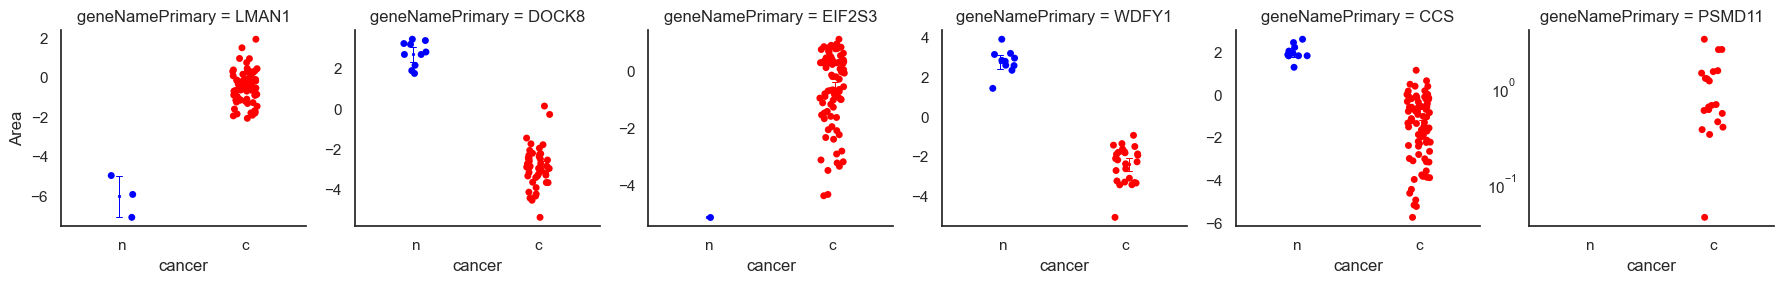

In [ ]:
# add in uniprot info

# This file is on the GitHub page

dfUniprot = pd.read_excel('/Users/jasonheld/Manuscripts/2022_Sarcoma-Exosomes/Figure2_Data_CancerVsNormal/uniprotAnnotationsForFigure2.xlsx')
dfUniprot = dfUniprot.rename(columns={'Entry' : 'protAcc'})
dfUniprot = dfUniprot.rename(columns={'Gene Names (primary)' : 'geneNamePrimary'})
dfUniprot = dfUniprot.drop(columns=['Length','Entry Name','Organism','Gene Names'])
dfUniprot['protAcc'] = dfUniprot['protAcc'].astype(str)
dfUniprot.drop_duplicates(subset=['protAcc'], inplace = True)

# annotate uniprot info by merging with dfUniprot
df = df.merge(dfUniprot, on='protAcc', how='left')

# select targets to show
tgtList = ['WDFY1', 'LMAN1','EIF2S3','PSMD11','CCS', 'DOCK8']
mask = df['geneNamePrimary'].isin(tgtList)

sns.set(rc={"lines.linewidth": 0.4})
sns.set_style("white")
g = sns.FacetGrid(df.loc[mask], col="geneNamePrimary", sharey=False)

g.map_dataframe(sns.stripplot, x = parser, y ='area', jitter = True, palette=['blue', 'red'])
g.map_dataframe(sns.pointplot, x =parser, y ='area', dodge = True, capsize=.05, palette=['blue', 'red'])

g.set_axis_labels('cancer', "Area")

plt.yscale('log')